<a href="https://colab.research.google.com/github/rahulchirra/Doing-math-with-python-/blob/main/chapter%2006%20Geometry%20shapes%20and%20fractals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# chapter 06 : Drawing geometric shapes and fractals

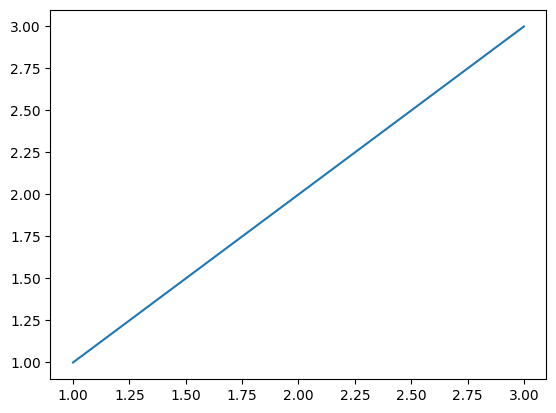

In [ ]:
import matplotlib.pyplot as plt
x = [1,2,3]
y = [1,2,3]
plt.plot(x,y)
plt.show()

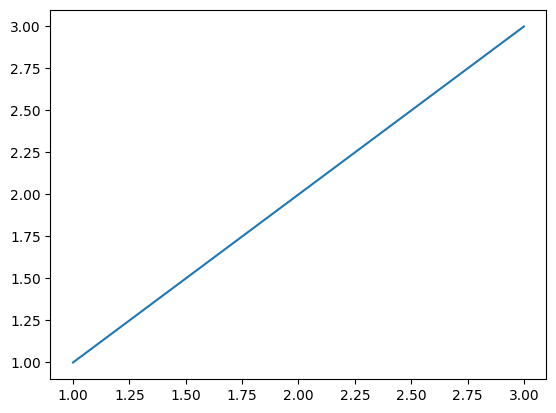

In [ ]:
import matplotlib.pyplot as plt
x = [1,2,3]
y = [1,2,3]
fig = plt.figure()
ax = plt.axes()
plt.plot(x,y)
plt.show()

plot a circle

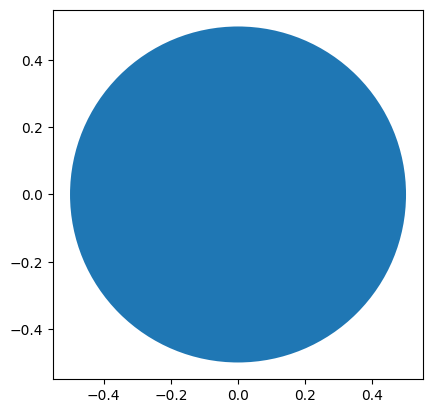

In [ ]:
import matplotlib.pyplot as plt

def create_circle():
  circle = plt.Circle((0,0), radius = 0.5)
  return circle


def show_shape(patch):
  ax = plt.gca()
  ax.add_patch(patch)
  plt.axis('scaled')
  plt.show()

if  __name__ == '__main__':
  c = create_circle()
  show_shape(c)

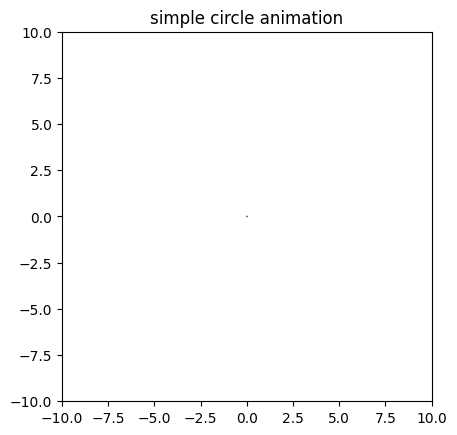

/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [ ]:
from matplotlib import pyplot as plt
from matplotlib import animation

def create_circle():
    circle = plt.Circle((0, 0), 0.05)
    return circle

def update_radius(i, circle):
    circle.radius = i * 0.5  # or use circle.set_radius(i*0.5) for newer matplotlib versions
    return circle,

def create_animation():
    fig = plt.gcf()
    ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))
    ax.set_aspect('equal')
    circle = create_circle()  # Call create_circle() here
    ax.add_patch(circle)
    # Now 'circle' is accessible within this function's scope
    anim = animation.FuncAnimation(
        fig, update_radius, fargs=(circle,), frames=30, interval=50 #change frags to fargs
    )

    plt.title('simple circle animation')
    plt.show()

if __name__ == '__main__':
    create_animation()

Animating a Projectile’s Trajectory


Enter the initial velocity (m/s): 20
Enter the angle of projection (degrees): 45


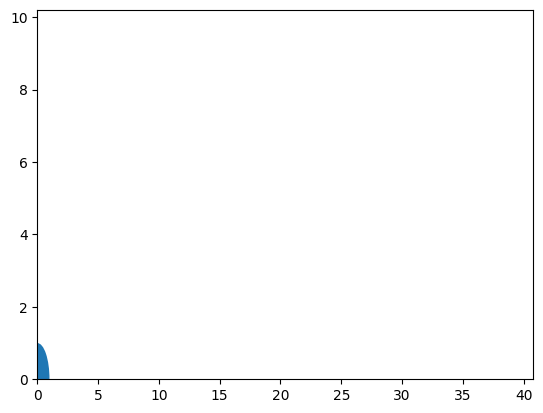

/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [ ]:
from matplotlib import pyplot as plt
from matplotlib import animation
import math

g = 9.8

def get_intervals(u, theta):
    t_flight = 2 * u * math.sin(theta) / g
    intervals = []
    start = 0
    interval = 0.005  # Renamed from intervals to interval

    while start < t_flight:
        intervals.append(start)
        start += interval
    return intervals

def update_positions(i, circle, intervals, u, theta):
    t = intervals[i]
    x = u * math.cos(theta) * t
    y = u * math.sin(theta) * t - 0.5 * g * t**2  # Corrected gravity calculation
    circle.center = (x, y)
    return circle

def create_animation(u, theta):
    intervals = get_intervals(u, theta)

    xmin = 0
    xmax = u * math.cos(theta) * intervals[-1]
    ymin = 0
    t_max = u * math.sin(theta) / g
    ymax = u * math.sin(theta) * t_max - 0.5 * g * t_max**2
    fig = plt.figure()
    ax = plt.axes(xlim=(xmin, xmax), ylim=(ymin, ymax))

    circle = plt.Circle((xmin, ymin), 1.0)  # Corrected to plt.Circle
    ax.add_patch(circle)

    anim = animation.FuncAnimation(fig, update_positions,
                                   fargs=(circle, intervals, u, theta),  # Corrected fargs
                                   frames=len(intervals), interval=1,
                                   repeat=False)
    plt.show()  # Added to display the animation

if __name__ == '__main__':
    try:
        u = float(input('Enter the initial velocity (m/s): '))
        theta = float(input('Enter the angle of projection (degrees): '))
    except ValueError:
        print('You entered an invalid input.')
    else:
        theta = math.radians(theta)
        create_animation(u, theta)

 Example of selecting a transformation from two equally probable
transformations

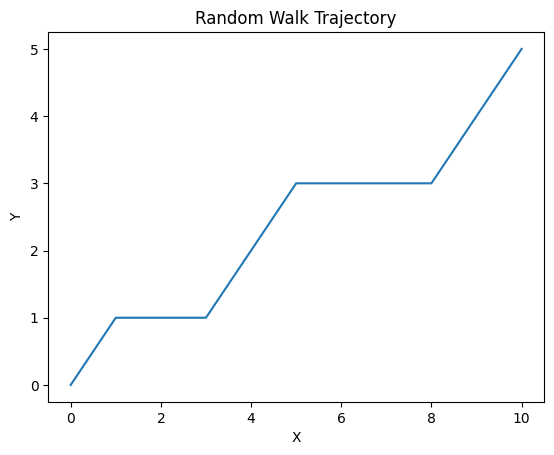

In [ ]:
import matplotlib.pyplot as plt
import random

def transformation_1(p):
    x = p[0]
    y = p[1]
    return x + 1, y

def transformation_2(p):
    x = p[0]
    y = p[1]
    return x + 1, y + 1

def transform(p):
    # List of transformation functions
    transformations = [transformation_1, transformation_2]

    # Pick a random transformation function and call it
    t = random.choice(transformations)
    x, y = t(p)

    return x, y

def build_trajectory(p, n):
    x = [p[0]]
    y = [p[1]]

    for i in range(n):
        p = transform(p)
        x.append(p[0])
        y.append(p[1])

    return x, y

# Example usage
p = (0, 0)  # Starting point
n = 10     # Number of steps

x, y = build_trajectory(p, n)

# Plot the trajectory
plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Walk Trajectory')
plt.show()

Drawing the Barnsley Fern


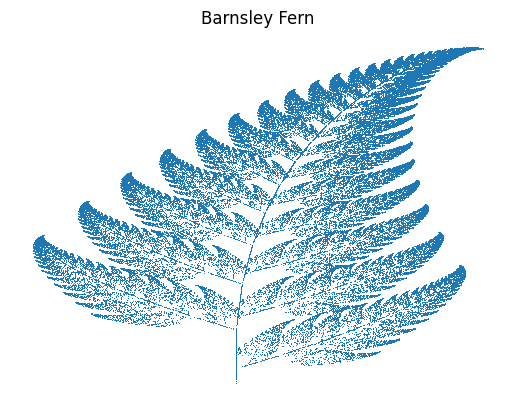

In [ ]:
import random
import matplotlib.pyplot as plt

def transformation_1(p):
    x = p[0]
    y = p[1]
    x1 = 0.85*x + 0.04*y
    y1 = -0.04*x + 0.85*y + 1.6
    return x1, y1

def transformation_2(p):
    x = p[0]
    y = p[1]
    x1 = 0.2*x - 0.26*y
    y1 = 0.23*x + 0.22*y + 1.6
    return x1, y1

def transformation_3(p):
    x = p[0]
    y = p[1]
    x1 = -0.15*x + 0.28*y
    y1 = 0.26*x + 0.24*y + 0.44
    return x1, y1

def transformation_4(p):
    x = p[0]
    y = p[1]
    x1 = 0
    y1 = 0.16*y
    return x1, y1

def transform(p):
    # Probabilities for each transformation
    probabilities = [0.85, 0.07, 0.07, 0.01]

    # Choose a random transformation based on probabilities
    random_index = random.choices([0, 1, 2, 3], weights=probabilities)[0]

    if random_index == 0:
        return transformation_1(p)
    elif random_index == 1:
        return transformation_2(p)
    elif random_index == 2:
        return transformation_3(p)
    else:
        return transformation_4(p)

def build_fern(n):
    x = [0]
    y = [0]

    for _ in range(n):
        p = transform((x[-1], y[-1]))
        x.append(p[0])
        y.append(p[1])

    return x, y

# Generate the fern
n = 100000  # Number of iterations
x, y = build_fern(n)

# Plot the fern
plt.plot(x, y, ',')  # Use ',' for faster plotting
plt.axis('off')
plt.title('Barnsley Fern')
plt.show()

Programming challenges


#1: Packing Circles into a Square


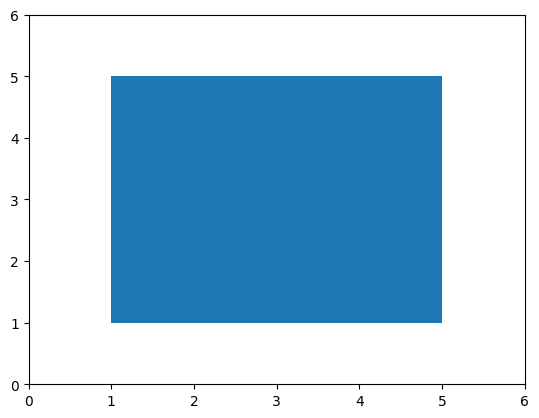

In [ ]:
from matplotlib import pyplot as plt

def draw_square():
    ax = plt.axes(xlim=(0, 6), ylim=(0, 6))
    square = plt.Polygon([(1, 1), (5, 1), (5, 5), (1, 5)], closed=True)
    ax.add_patch(square)
    plt.show()

if __name__ == '__main__':
    draw_square()

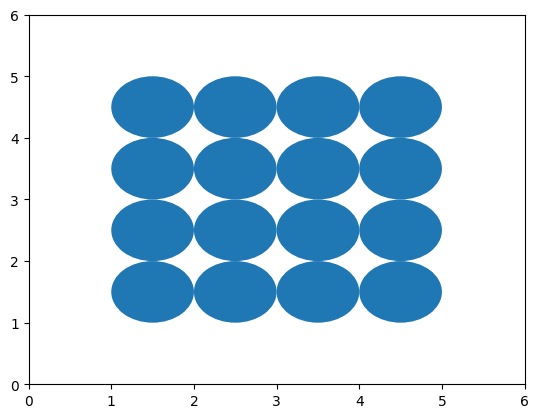

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def draw_circle(x, y):

    return Circle((x, y), radius=0.5)

def draw_square_with_circles():
    """
    Draws a square with circles packed inside.
    """
    fig, ax = plt.subplots()
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 6)

    y = 1.5
    while y < 5:
        x = 1.5
        while x < 5:
            c = draw_circle(x, y)
            ax.add_patch(c)
            x += 1.0
        y += 1.0

    plt.show()

if __name__ == "__main__":
    draw_square_with_circles()

#2: Drawing the Sierpin ´  ski Triangle


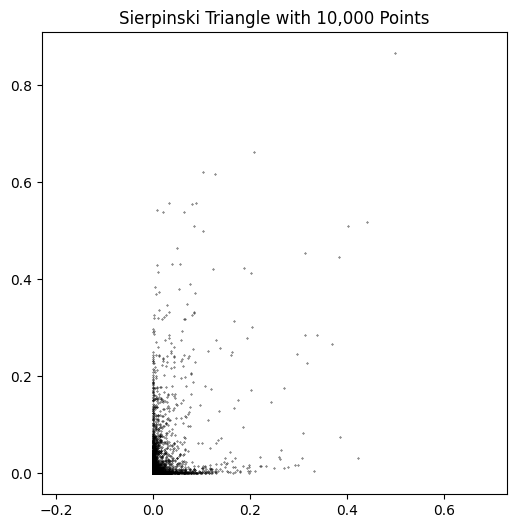

In [ ]:
import random
import matplotlib.pyplot as plt

def sierpinski(n):
    points = [(0.5, 0.866)]  # Starting point at the top vertex

    for _ in range(n):
        # Choose a random vertex of the current point's triangle
        x, y = random.choice(points)
        new_x = random.uniform(0, x)  # Random x within the left half
        new_y = random.uniform(0, y)  # Random y within the lower half

        points.append((new_x, new_y))

    return points

# Generate points for the Sierpinski triangle
num_points = 10000
points = sierpinski(num_points)

# Extract x and y coordinates from the points
x, y = zip(*points)

# Plot the Sierpinski triangle
plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=0.1, color='black')
plt.title("Sierpinski Triangle with 10,000 Points")
plt.axis('equal')
plt.show()

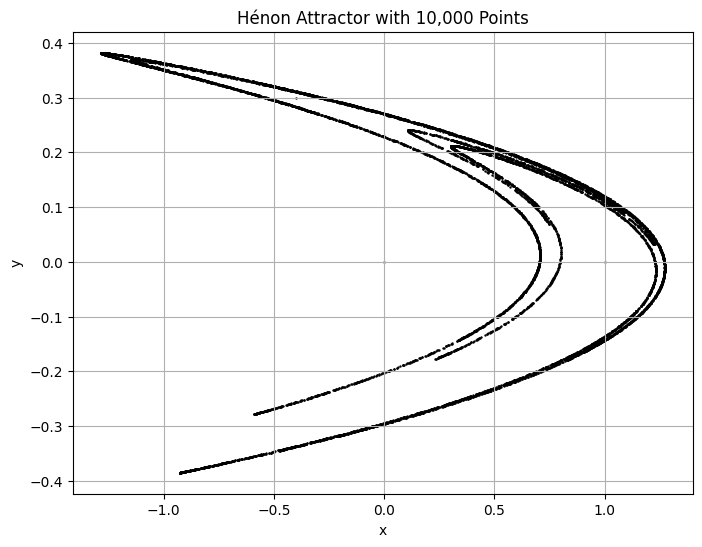

In [33]:
import matplotlib.pyplot as plt

def henon_map(x, y):
  """Implements the Hénon map transformation."""
  x_new = y + 1 - 1.4 * x**2
  y_new = 0.3 * x
  return x_new, y_new

def generate_henon_points(num_points=10000):
  """Generates a list of points using the Hénon map."""
  x, y = 0.0, 0.0  # Initial point
  points = [(x, y)]

  for _ in range(num_points):
    x, y = henon_map(x, y)
    points.append((x, y))

  return points

# Generate Hénon points
points = generate_henon_points()

# Extract x and y coordinates from the points
x_coords, y_coords = zip(*points)

# Plot the Hénon attractor
plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, s=0.5, color='black')
plt.title("Hénon Attractor with 10,000 Points")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

 #4: Drawing the Mandelbrot Set


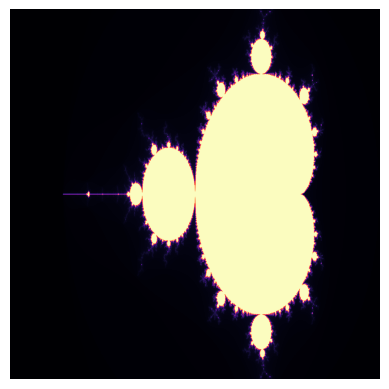

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    # Calculates the number of iterations for a given complex number c.
    z = 0
    for n in range(max_iter):
        z = z**2 + c
        if abs(z) > 2:
            return n
    return max_iter

def generate_mandelbrot_set(x_min, x_max, y_min, y_max, width, height, max_iter):
    # Generates the Mandelbrot set as a 2D array.
    x_step = (x_max - x_min) / width
    y_step = (y_max - y_min) / height

    mandelbrot_set = np.zeros((height, width))

    for i in range(height):
        for j in range(width):
            c = complex(x_min + j * x_step, y_min + i * y_step)
            mandelbrot_set[i, j] = mandelbrot(c, max_iter)

    return mandelbrot_set

# Set parameters
x_min, x_max = -2.5, 1.0
y_min, y_max = -1.0, 1.0
width, height = 1000, 1000
max_iter = 255

# Generate the Mandelbrot set
mandelbrot_set = generate_mandelbrot_set(x_min, x_max, y_min, y_max, width, height, max_iter)

# Display the Mandelbrot set
plt.imshow(mandelbrot_set, cmap='magma', interpolation='bilinear')
plt.axis('off')
plt.show()

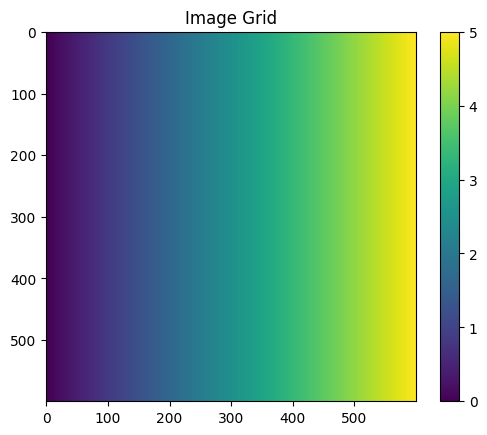

In [35]:
import matplotlib.pyplot as plt
import numpy as np

def create_image_grid(width, height):
    # Creates a 2D array representing a grid of colors.
    x = np.linspace(0, 5, width)
    y = np.linspace(0, 5, height)
    x, y = np.meshgrid(x, y)

    # Determine the color for each point based on its coordinates
    # Here, we use a simple example: color based on x-coordinate
    colors = x  # Replace with your desired color function

    return colors

# Set the width and height of the image
width = 600
height = 600

# Create the image grid
image_data = create_image_grid(width, height)

# Display the image using matplotlib
plt.imshow(image_data, cmap='viridis')
plt.colorbar()
plt.title("Image Grid")
plt.show()

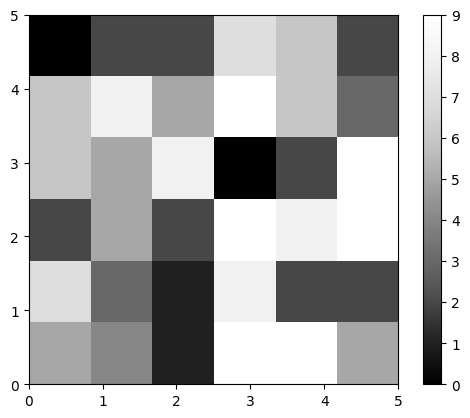

In [36]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random

def initialize_image(x_p, y_p):
    # Initializes a 2D list with zeros to represent the image.
    image = []
    for i in range(y_p):
        x_colors = []
        for j in range(x_p):
            x_colors.append(0)
        image.append(x_colors)
    return image

def color_points():
    # Colors the points in the image randomly.
    x_p = 6
    y_p = 6
    image = initialize_image(x_p, y_p)

    for i in range(y_p):
        for j in range(x_p):
            image[i][j] = random.randint(0, 10)

    plt.imshow(image, origin='lower', extent=(0, 5, 0, 5),
               cmap=cm.Greys_r, interpolation='nearest')
    plt.colorbar()
    plt.show()

if __name__ == '__main__':
    color_points()

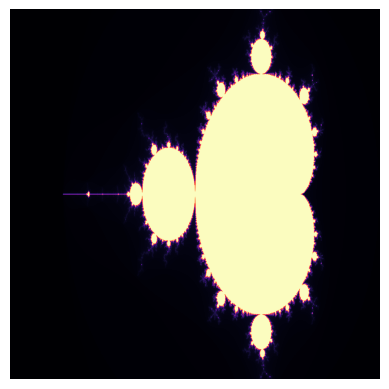

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    # Calculates the number of iterations for a given complex number c.
    z = 0
    for n in range(max_iter):
        z = z**2 + c
        if abs(z) > 2:
            return n
    return max_iter

def generate_mandelbrot_set(x_min, x_max, y_min, y_max, width, height, max_iter):
    # Generates the Mandelbrot set as a 2D array.
    x_step = (x_max - x_min) / width
    y_step = (y_max - y_min) / height

    mandelbrot_set = np.zeros((height, width))

    for i in range(height):
        for j in range(width):
            c = complex(x_min + j * x_step, y_min + i * y_step)
            mandelbrot_set[i, j] = mandelbrot(c, max_iter)

    return mandelbrot_set

# Set parameters
x_min, x_max = -2.5, 1.0
y_min, y_max = -1.0, 1.0
width, height = 1000, 1000
max_iter = 255

# Generate the Mandelbrot set
mandelbrot_set = generate_mandelbrot_set(x_min, x_max, y_min, y_max, width, height, max_iter)

# Display the Mandelbrot set
plt.imshow(mandelbrot_set, cmap='magma', interpolation='bilinear')
plt.axis('off')
plt.show()

chapter ends.